## Get data

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2022-08-06 03:21:50--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.002s  

2022-08-06 03:21:51 (80.7 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing time series data

In [ ]:
import pandas as pd

df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"])

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
len(df)

2787

In [ ]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


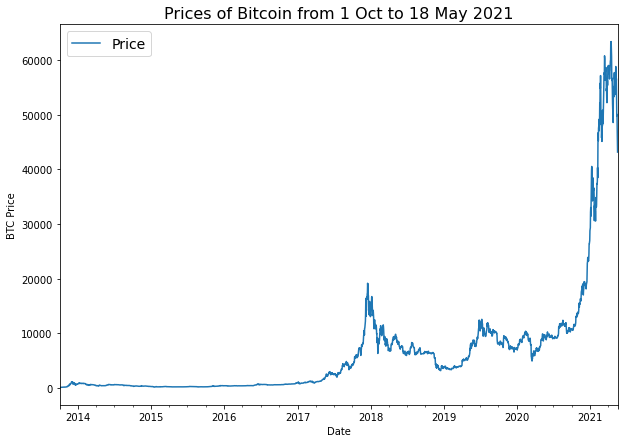

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Prices of Bitcoin from 1 Oct to 18 May 2021", fontsize=16)
plt.legend(fontsize=14)

## Importing time series data with python csv module

In [ ]:
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader) # skip first line

  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d"))
    btc_price.append(float(line[2]))

timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 0, 'Date')

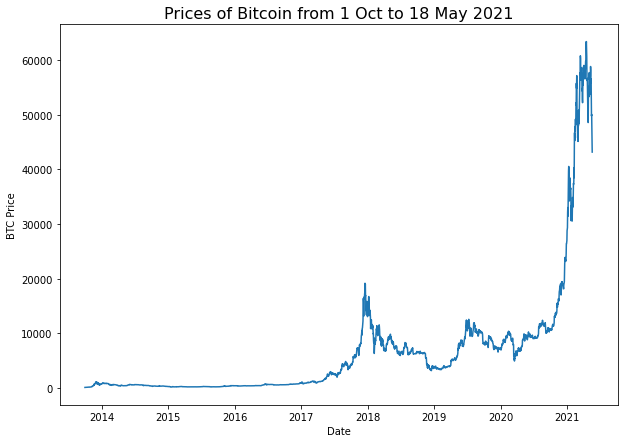

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("Prices of Bitcoin from 1 Oct to 18 May 2021", fontsize=16)
plt.xlabel("Date")

## Format data part1: Create train and test sets of our time series data

### the wrong way

In [ ]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps,
                                                    prices,
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

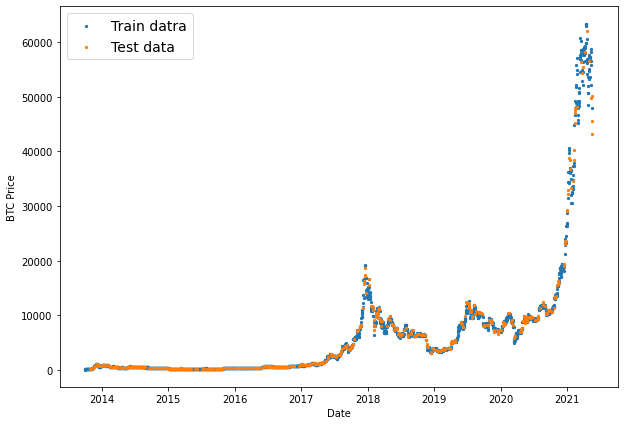

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train datra")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show()

### the right way

In [ ]:
split_size = int(0.8 * len(prices))

# Create train data splits
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

<Figure size 720x504 with 0 Axes>

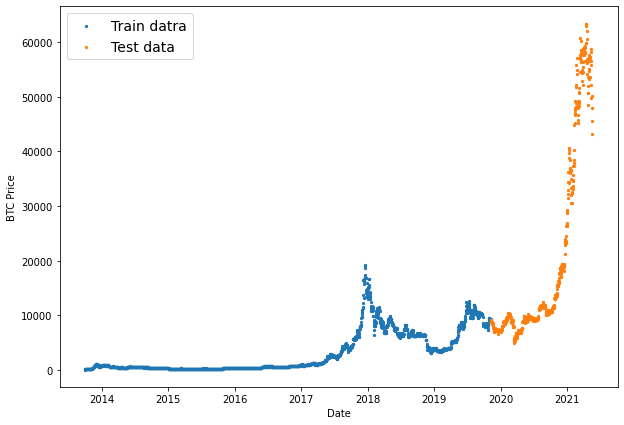

In [ ]:
plt.figure(figsize=(10, 7))
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train datra")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show()

In [ ]:
# plotting function
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plot timesteps aginst values

  Parameters
  ----------
  timesteps : array of timestep values
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot
  end ; where to end the plot
  label : label to show on plot
  """
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

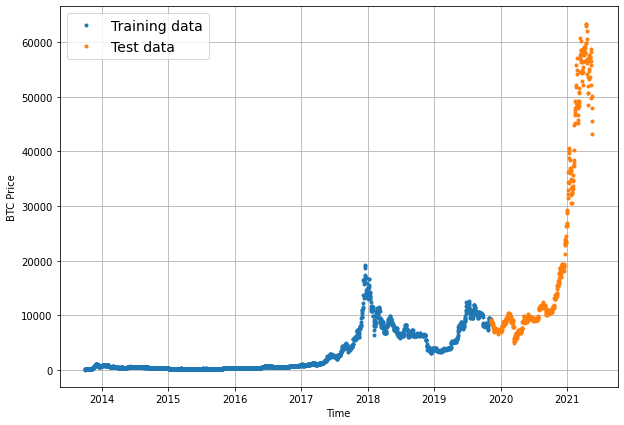

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label="Training data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

## Modelling Experiments

## Model 0

In [ ]:
# Naive forcast
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

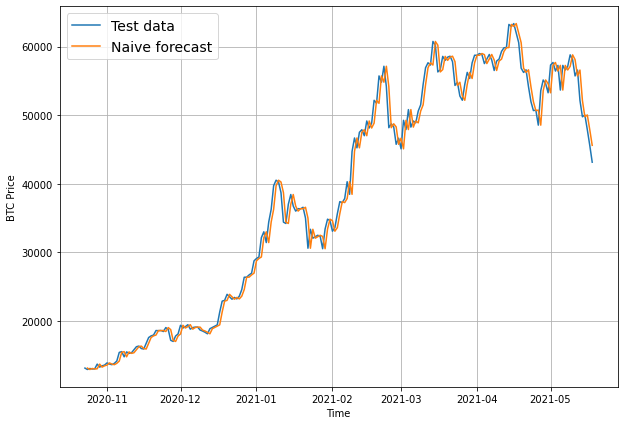

In [ ]:
plt.figure(figsize=(10,7))
# plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, start=350, format="-", label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=350, format="-", label="Naive forecast")

In [ ]:
# Evaluating a time series model
import tensorflow as tf

In [ ]:
# MASE implementation
def maen_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1, hence shift 1 day

  return mae / mae_naive_no_season

In [ ]:
maen_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

In [ ]:
# function to evaluate
def evaluate_preds(y_true, y_pred):
  # Make sure float32 data type. float32 to is faster
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = maen_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(), 
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

In [ ]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737222>

Supervised learning approach

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7
# use window size to predict horizon

In [ ]:
# function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  """
  Create labels for windowed dataset

  ex) if horizon=1
  Input: [0,1,2,3,4,5,6,7] -> Output: ([0,1,2,3,4,5,6],[7])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [ ]:
# Create a function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T
  # print(f"Window indexes:\n {window_indexes, window_indexes.shape}")

  # 3. Index on the target array with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  # print(windowed_array)

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label [125.96116]


In [ ]:
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label [43144.47129086]


In [ ]:
prices[-1]

43144.4712908603

## Turning windows into training and test sets

In [ ]:
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits
  """
  splits_size = int(len(windows) * (1 - test_split))
  train_windows = windows[:splits_size]
  train_labels = labels[:splits_size]
  test_windows = windows[splits_size:]
  test_labels = labels[splits_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]), array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [ ]:
test_windows[:5], test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

In [ ]:
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

## Make a modelling checkpoint

In [ ]:
import os

# function to create a ModelCheckpoint callback
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor="val_loss",
                                            vebose=0,
                                            save_best_only=True)

## Model 1: Dense window=7, horizon=1

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear") # linear acrtivation is the same as having no activation
], name="model_1_dense")

model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 6s 82ms/step - loss: 780.3455 - mae: 780.3455 - mse: 2312725.7500 - val_loss: 2279.6528 - val_mae: 2279.6528 - val_mse: 12772731.0000
Epoch 2/100
18/18 [==============================] - 1s 44ms/step - loss: 247.6756 - mae: 247.6756 - mse: 285481.1875 - val_loss: 1005.9993 - val_mae: 1005.9993 - val_mse: 3441833.2500
Epoch 3/100
18/18 [==============================] - 1s 63ms/step - loss: 188.4116 - mae: 188.4116 - mse: 171891.6094 - val_loss: 923.2862 - val_mae: 923.2861 - val_mse: 2868220.7500
Epoch 4/100
18/18 [==============================] - 1s 83ms/step - loss: 169.4340 - mae: 169.4340 - mse: 151700.5781 - val_loss: 900.5872 - val_mae: 900.5872 - val_mse: 2683715.5000
Epoch 5/100
18/18 [==============================] - 1s 81ms/step - loss: 165.0894 - mae: 165.0894 - mse: 145490.7812 - val_loss: 895.2237 - val_mae: 895.2237 - val_mse: 2564574.5000
Epoch 6/100
18/18 [==============================] - 2s 92ms/step - loss: 158.5

In [ ]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 585.9758 - mae: 585.9758 - mse: 1197802.1250


[585.9757690429688, 585.9757690429688, 1197802.125]

In [ ]:
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 6ms/step - loss: 568.9510 - mae: 568.9510 - mse: 1171743.6250


[568.9510498046875, 568.9510498046875, 1171743.625]

In [ ]:
def make_preds(model, input_data):
  """
  Using model and input_data to make predictions
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [ ]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

(556, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8861.71 , 8769.887, 9015.711, 8795.519, 8723.811, 8730.111,
        8691.952, 8502.054, 8460.961, 8516.548], dtype=float32)>)

In [ ]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 568.95105,
 'mape': 2.5448983,
 'mase': 0.9994894,
 'mse': 1171743.8,
 'rmse': 1082.4711}

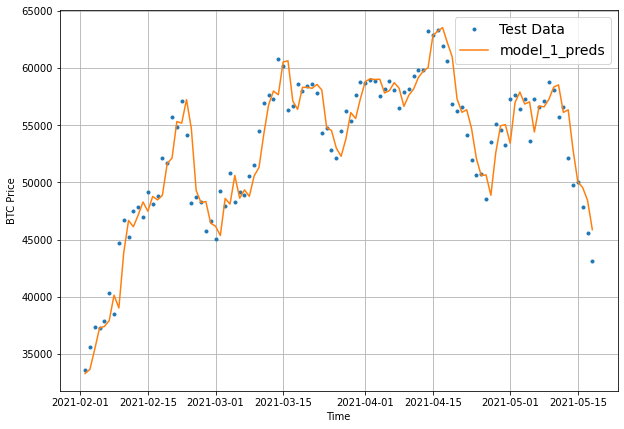

In [ ]:
# Plot model 1 predictions
offset = 450
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test Data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 format="-",
                 label="model_1_preds")

## Model 2: Dense window=30, horizon=1

In [ ]:
HORIZON = 1
WINDOW_SIZE = 30

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [ ]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [ ]:
train_windows[:3], train_labels[:3]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
         164.31499, 177

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name='model_2_dense')

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

In [ ]:
model_2.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: mod

In [ ]:
# Evaluate model 2
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 659.3332


659.3331909179688

In [ ]:
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 605.8741


605.8740844726562

In [ ]:
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

In [ ]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 605.8741,
 'mape': 2.726445,
 'mase': 1.0590738,
 'mse': 1273360.8,
 'rmse': 1128.4329}

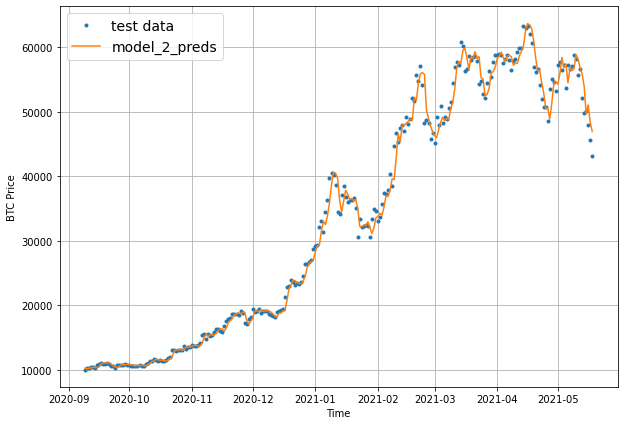

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

## Model 3 Dense window = 30, horizon = 7

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: mod

In [ ]:
# Evaluate
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1300.1523


1300.15234375

In [ ]:
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1237.5065


1237.5064697265625

In [ ]:
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9004.694 , 9048.1   , 9425.09  , 9258.256 , 9495.797 , 9558.453 ,
        9357.3545],
       [8735.506 , 8840.303 , 9247.793 , 8885.601 , 9097.186 , 9174.327 ,
        9156.818 ],
       [8672.508 , 8782.387 , 9123.857 , 8770.371 , 9007.13  , 9003.869 ,
        9042.725 ],
       [8874.399 , 8784.74  , 9043.902 , 8943.052 , 9033.477 , 9176.489 ,
        9039.677 ],
       [8825.891 , 8777.44  , 8926.78  , 8870.179 , 9213.232 , 9268.156 ,
        8942.487 ]], dtype=float32)>

In [ ]:
model_3_preds.shape, tf.squeeze(test_labels).shape

(TensorShape([551, 7]), TensorShape([551, 7]))

In [ ]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([ 513.6056  ,  355.08328 ,  327.17075 ,  358.5106  ,  420.53305 ,
         537.854   ,  545.6617  ,  485.9228  ,  584.49713 ,  687.38214 ,
         836.2264  ,  755.1577  ,  731.4957  ,  775.3399  ,  567.95544 ,
         266.80865 ,  188.80217 ,  188.10799 ,  253.095   ,  301.43256 ,
         151.10721 ,  196.81473 ,  191.46178 ,  231.65031 ,  143.61125 ,
         122.59089 ,  132.78879 ,  190.8118  ,  179.15994 ,  228.26018 ,
         314.44022 ,  379.09244 ,  278.32526 ,  295.3471  ,  299.3852  ,
         248.64983 ,  299.75662 ,  259.69434 ,  180.30531 ,  206.72922 ,
         374.62863 ,  144.85086 ,  142.33635 ,  131.11613 ,   93.9412  ,
          54.825542,   73.79548 ,  103.60128 ,  121.333916,  168.67278 ,
         183.90945 ,  152.25307 ,  186.57199 ,  146.91267 ,  240.42912 ,
         351.00662 ,  540.952   ,  549.1573  ,  521.2411  ,  526.8554  ,
         453.36237 ,  257.98102 ,  277.29486 ,  301.8247  ,  455.718   ,
         458.96017 ,  503.4438  ,  522.3119 

In [ ]:
# change evaluation function for larger horizons
def evaluate_preds(y_true, y_pred):
  # Make sure float32 data type. float32 to is faster
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = maen_absolute_scaled_error(y_true, y_pred)

  # for longer horizon
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(), 
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1237.5063,
 'mape': 5.5588784,
 'mase': 2.2020733,
 'mse': 5405198.5,
 'rmse': 1425.7478}

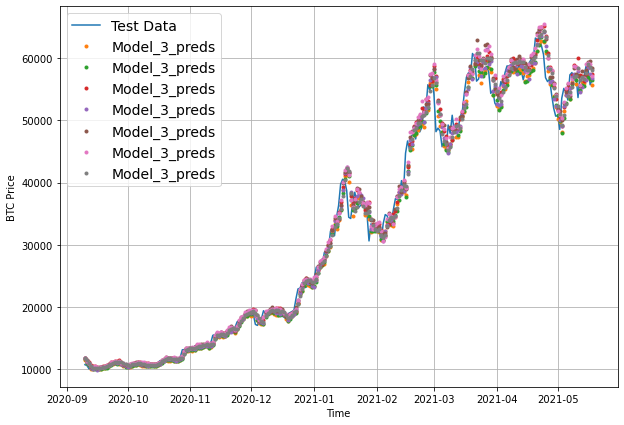

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format="-", label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="Model_3_preds")

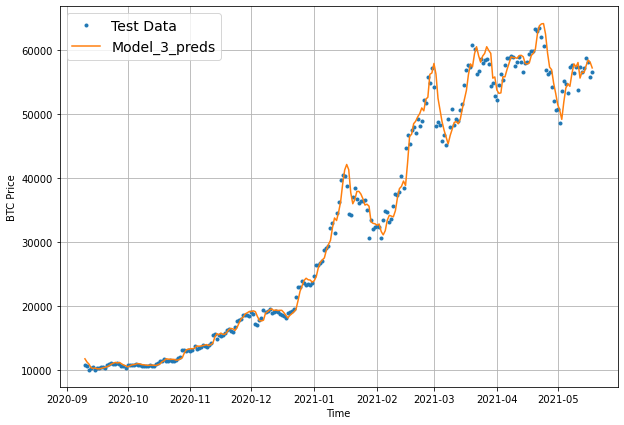

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 start=offset,
                 format="-",
                 label="Model_3_preds")

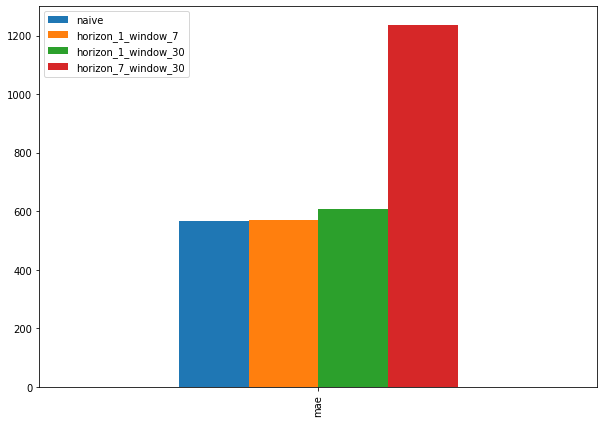

In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar")

## Model 4: Conv1D

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Create windowed dataset
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

In [ ]:
train_windows[0].shape

(7,)

In [ ]:
 x = tf.constant(train_windows[0])
 x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [ ]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension

In [ ]:
print(f"Original shape: {x.shape}")
print(f"Expanded shape: {expand_dims_layer(x).shape}")
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [ ]:
# Model 4
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
    layers.Dense(HORIZON)
], name="model_4_conv1D")

model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets wr

In [ ]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 610.1541


610.154052734375

In [ ]:
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D/")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 570.8285


570.8284912109375

In [ ]:
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8851.464, 8754.47 , 8983.927, 8759.671, 8703.627, 8708.294,
       8661.667, 8494.839, 8435.316, 8492.114], dtype=float32)>

In [ ]:
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                y_pred=model_4_preds)
model_4_results

{'mae': 570.8284,
 'mape': 2.5593355,
 'mase': 1.0027875,
 'mse': 1176671.2,
 'rmse': 1084.7448}

## Model 5: LSTM

In [ ]:
tf.random.set_seed(42)

inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
# x = layers.Dense(32, activation="relu")(x)
outputs = layers.Dense(HORIZON)(x)

model_5 = tf.keras.Model(inputs=inputs, outputs=outputs, name="model_5_LSTM")

model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

In [ ]:
model_5.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
12/18 [===================>..........] - ETA: 0s - loss: 2534.5144 INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 110ms/step - loss: 2323.6082 - val_loss: 9222.6523
Epoch 2/100
14/18 [======================>.......] - ETA: 0s - loss: 817.7504 INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 133ms/step - loss: 695.4739 - val_loss: 1486.0555
Epoch 3/100
12/18 [===================>..........] - ETA: 0s - loss: 266.4913INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 113ms/step - loss: 237.3967 - val_loss: 1298.9084
Epoch 4/100
11/18 [=================>............] - ETA: 0s - loss: 196.5330INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 181.9180 - val_loss: 966.6431
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 173.4022 - val_loss: 970.9295
Epoch 6/100
11/18 [=================>............] - ETA: 0s - loss: 169.3568INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 173.5414 - val_loss: 941.4746
Epoch 7/100
11/18 [=================>............] - ETA: 0s - loss: 181.8447INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 132ms/step - loss: 170.3566 - val_loss: 898.5215
Epoch 8/100
18/18 [==============================] - 0s 6ms/step - loss: 157.6712 - val_loss: 914.8642
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 166.5143 - val_loss: 1079.0776
Epoch 10/100
12/18 [===================>..........] - ETA: 0s - loss: 163.3890INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 115ms/step - loss: 162.3369 - val_loss: 877.1690
Epoch 11/100
18/18 [==============================] - 0s 6ms/step - loss: 163.0841 - val_loss: 924.1126
Epoch 12/100
18/18 [==============================] - 0s 7ms/step - loss: 168.5598 - val_loss: 941.6025
Epoch 13/100
18/18 [==============================] - 0s 6ms/step - loss: 166.4726 - val_loss: 934.8436
Epoch 14/100
18/18 [==============================] - 0s 6ms/step - loss: 163.9537 - val_loss: 920.2160
Epoch 15/100
11/18 [=================>............] - ETA: 0s - loss: 151.0251INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 152.9470 - val_loss: 856.2653
Epoch 16/100
18/18 [==============================] - 0s 7ms/step - loss: 147.4420 - val_loss: 898.9914
Epoch 17/100
18/18 [==============================] - 0s 7ms/step - loss: 151.0533 - val_loss: 943.1418
Epoch 18/100
18/18 [==============================] - 0s 6ms/step - loss: 157.8232 - val_loss: 924.0046
Epoch 19/100
18/18 [==============================] - 0s 6ms/step - loss: 155.9198 - val_loss: 911.4753
Epoch 20/100
18/18 [==============================] - 0s 8ms/step - loss: 155.6456 - val_loss: 862.6680
Epoch 21/100
18/18 [==============================] - 0s 6ms/step - loss: 153.1514 - val_loss: 862.5831
Epoch 22/100
18/18 [==============================] - 0s 6ms/step - loss: 151.4883 - val_loss: 863.8172
Epoch 23/100
18/18 [==============================] - 0s 6ms/step - loss: 150.7770 - val_loss: 886.8356
Epoch 24/100
18/18 [==============================] - 0s 6ms/step - loss: 14

INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 132ms/step - loss: 146.8467 - val_loss: 845.2782
Epoch 26/100
12/18 [===================>..........] - ETA: 0s - loss: 146.2229INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 112ms/step - loss: 145.9843 - val_loss: 818.6807
Epoch 27/100
12/18 [===================>..........] - ETA: 0s - loss: 150.8635INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 144.4289 - val_loss: 804.3279
Epoch 28/100
11/18 [=================>............] - ETA: 0s - loss: 145.3607INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 142.4610 - val_loss: 789.0859
Epoch 29/100
18/18 [==============================] - 0s 8ms/step - loss: 141.8739 - val_loss: 806.6758
Epoch 30/100
18/18 [==============================] - 0s 6ms/step - loss: 142.0521 - val_loss: 794.8836
Epoch 31/100
12/18 [===================>..........] - ETA: 0s - loss: 140.2585INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 132ms/step - loss: 138.4690 - val_loss: 773.2812
Epoch 32/100
11/18 [=================>............] - ETA: 0s - loss: 137.6196INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 155ms/step - loss: 137.1986 - val_loss: 772.2625
Epoch 33/100
18/18 [==============================] - 0s 7ms/step - loss: 135.9342 - val_loss: 786.4805
Epoch 34/100
12/18 [===================>..........] - ETA: 0s - loss: 142.0684INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 136.1931 - val_loss: 744.4506
Epoch 35/100
18/18 [==============================] - 0s 6ms/step - loss: 133.4513 - val_loss: 756.2970
Epoch 36/100
10/18 [===============>..............] - ETA: 0s - loss: 128.8641INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 114ms/step - loss: 134.0992 - val_loss: 735.1729
Epoch 37/100
18/18 [==============================] - 0s 12ms/step - loss: 130.6932 - val_loss: 745.9099
Epoch 38/100
13/18 [====================>.........] - ETA: 0s - loss: 133.4364INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 130ms/step - loss: 129.2891 - val_loss: 717.2498
Epoch 39/100
18/18 [==============================] - 0s 6ms/step - loss: 129.6088 - val_loss: 719.0665
Epoch 40/100
18/18 [==============================] - 0s 7ms/step - loss: 129.6111 - val_loss: 732.0632
Epoch 41/100
12/18 [===================>..........] - ETA: 0s - loss: 130.4034INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 127.1393 - val_loss: 702.9354
Epoch 42/100
11/18 [=================>............] - ETA: 0s - loss: 126.7599INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 97ms/step - loss: 125.6113 - val_loss: 700.8702
Epoch 43/100
18/18 [==============================] - 0s 7ms/step - loss: 125.9959 - val_loss: 704.3682
Epoch 44/100
12/18 [===================>..........] - ETA: 0s - loss: 124.8729INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 112ms/step - loss: 125.2241 - val_loss: 698.7766
Epoch 45/100
18/18 [==============================] - ETA: 0s - loss: 122.5007INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 139ms/step - loss: 122.5007 - val_loss: 683.0590
Epoch 46/100
11/18 [=================>............] - ETA: 0s - loss: 130.6197INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 124.4726 - val_loss: 679.1873
Epoch 47/100
18/18 [==============================] - 0s 7ms/step - loss: 122.1862 - val_loss: 705.4241
Epoch 48/100
12/18 [===================>..........] - ETA: 0s - loss: 119.4245INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 100ms/step - loss: 122.0458 - val_loss: 677.0784
Epoch 49/100
11/18 [=================>............] - ETA: 0s - loss: 127.1128INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 122ms/step - loss: 121.1548 - val_loss: 674.6848
Epoch 50/100
18/18 [==============================] - 0s 11ms/step - loss: 122.8890 - val_loss: 691.4816
Epoch 51/100
18/18 [==============================] - 0s 13ms/step - loss: 122.2994 - val_loss: 737.3929
Epoch 52/100
13/18 [====================>.........] - ETA: 0s - loss: 128.5591INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 122ms/step - loss: 121.2944 - val_loss: 657.2365
Epoch 53/100
10/18 [===============>..............] - ETA: 0s - loss: 114.9636INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 119.7668 - val_loss: 652.7970
Epoch 54/100
18/18 [==============================] - 0s 6ms/step - loss: 120.1222 - val_loss: 654.4439
Epoch 55/100
11/18 [=================>............] - ETA: 0s - loss: 127.3472INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 100ms/step - loss: 119.2566 - val_loss: 647.2831
Epoch 56/100
12/18 [===================>..........] - ETA: 0s - loss: 121.4963INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 133ms/step - loss: 120.0544 - val_loss: 643.7808
Epoch 57/100
18/18 [==============================] - 0s 8ms/step - loss: 123.1243 - val_loss: 671.1797
Epoch 58/100
11/18 [=================>............] - ETA: 0s - loss: 120.3613INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 119ms/step - loss: 118.4059 - val_loss: 640.2656
Epoch 59/100
18/18 [==============================] - 0s 7ms/step - loss: 117.7119 - val_loss: 645.3837
Epoch 60/100
12/18 [===================>..........] - ETA: 0s - loss: 117.1983INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 141ms/step - loss: 118.5346 - val_loss: 638.7429
Epoch 61/100
18/18 [==============================] - 0s 14ms/step - loss: 118.3129 - val_loss: 689.4144
Epoch 62/100
18/18 [==============================] - 0s 14ms/step - loss: 121.4350 - val_loss: 748.5565
Epoch 63/100
18/18 [==============================] - 0s 16ms/step - loss: 123.1006 - val_loss: 651.8298
Epoch 64/100
18/18 [==============================] - 0s 17ms/step - loss: 115.9679 - val_loss: 672.9166
Epoch 65/100
16/18 [=========================>....] - ETA: 0s - loss: 118.3634INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 140ms/step - loss: 118.8341 - val_loss: 631.7538
Epoch 66/100
18/18 [==============================] - 0s 6ms/step - loss: 116.2212 - val_loss: 634.5445
Epoch 67/100
10/18 [===============>..............] - ETA: 0s - loss: 111.3292INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 100ms/step - loss: 116.1580 - val_loss: 623.8932
Epoch 68/100
18/18 [==============================] - 0s 7ms/step - loss: 115.5543 - val_loss: 635.4929
Epoch 69/100
18/18 [==============================] - 0s 6ms/step - loss: 120.5866 - val_loss: 626.3387
Epoch 70/100
12/18 [===================>..........] - ETA: 0s - loss: 111.8156INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 119ms/step - loss: 114.9188 - val_loss: 619.3181
Epoch 71/100
18/18 [==============================] - 0s 7ms/step - loss: 114.8998 - val_loss: 650.9373
Epoch 72/100
18/18 [==============================] - 0s 6ms/step - loss: 118.2033 - val_loss: 630.5287
Epoch 73/100
18/18 [==============================] - 0s 18ms/step - loss: 115.3612 - val_loss: 623.0369
Epoch 74/100
18/18 [==============================] - 0s 19ms/step - loss: 115.0345 - val_loss: 623.0776
Epoch 75/100
18/18 [==============================] - 0s 15ms/step - loss: 115.2057 - val_loss: 640.5281
Epoch 76/100
18/18 [==============================] - ETA: 0s - loss: 114.1402INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 142ms/step - loss: 114.1402 - val_loss: 614.4062
Epoch 77/100
18/18 [==============================] - 0s 7ms/step - loss: 115.5973 - val_loss: 689.8776
Epoch 78/100
18/18 [==============================] - 0s 6ms/step - loss: 117.2611 - val_loss: 645.2790
Epoch 79/100
11/18 [=================>............] - ETA: 0s - loss: 110.4640INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 100ms/step - loss: 114.1995 - val_loss: 608.7159
Epoch 80/100
18/18 [==============================] - 0s 7ms/step - loss: 112.7125 - val_loss: 614.9222
Epoch 81/100
18/18 [==============================] - 0s 7ms/step - loss: 113.3684 - val_loss: 634.8466
Epoch 82/100
12/18 [===================>..........] - ETA: 0s - loss: 120.5586INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 115.9701 - val_loss: 607.8510
Epoch 83/100
18/18 [==============================] - 0s 7ms/step - loss: 113.3599 - val_loss: 628.8181
Epoch 84/100
18/18 [==============================] - 0s 6ms/step - loss: 114.4113 - val_loss: 628.5579
Epoch 85/100
18/18 [==============================] - 0s 7ms/step - loss: 114.8363 - val_loss: 634.7715
Epoch 86/100
18/18 [==============================] - 0s 6ms/step - loss: 115.5462 - val_loss: 613.5223
Epoch 87/100
12/18 [===================>..........] - ETA: 0s - loss: 115.3621INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 142ms/step - loss: 112.5059 - val_loss: 604.7603
Epoch 88/100
13/18 [====================>.........] - ETA: 0s - loss: 115.0817INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 110ms/step - loss: 111.7706 - val_loss: 601.5748
Epoch 89/100
18/18 [==============================] - 0s 7ms/step - loss: 111.8470 - val_loss: 624.0131
Epoch 90/100
18/18 [==============================] - 0s 6ms/step - loss: 115.6354 - val_loss: 662.9452
Epoch 91/100
18/18 [==============================] - 0s 6ms/step - loss: 116.1836 - val_loss: 636.0310
Epoch 92/100
18/18 [==============================] - 0s 8ms/step - loss: 113.1700 - val_loss: 606.0366
Epoch 93/100
12/18 [===================>..........] - ETA: 0s - loss: 114.6568INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 97ms/step - loss: 112.4748 - val_loss: 599.8319
Epoch 94/100
18/18 [==============================] - 0s 7ms/step - loss: 111.2637 - val_loss: 601.3256
Epoch 95/100
12/18 [===================>..........] - ETA: 0s - loss: 109.0149INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 115ms/step - loss: 111.0185 - val_loss: 597.1485
Epoch 96/100
18/18 [==============================] - 0s 7ms/step - loss: 112.3787 - val_loss: 601.1596
Epoch 97/100
18/18 [==============================] - 0s 6ms/step - loss: 111.4700 - val_loss: 626.1573
Epoch 98/100
18/18 [==============================] - 0s 7ms/step - loss: 111.7326 - val_loss: 601.0142
Epoch 99/100
12/18 [===================>..........] - ETA: 0s - loss: 109.4926INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 132ms/step - loss: 110.7480 - val_loss: 594.6030
Epoch 100/100
18/18 [==============================] - 0s 7ms/step - loss: 111.9943 - val_loss: 595.9847


In [ ]:
model_5 = tf.keras.models.load_model("model_experiments/model_5_LSTM/")

In [ ]:
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 594.6030


594.6029663085938

In [ ]:
# Make predictions
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8978.46 , 8810.951, 8997.779, 8836.308, 8731.047], dtype=float32)>

In [ ]:
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 594.60297,
 'mape': 2.6717565,
 'mase': 1.0445527,
 'mse': 1267231.9,
 'rmse': 1125.7139}

## Make Multivariate dataset

In [ ]:
# add the bitcoin halving events
block_reward_1 = 50 # 3 January 2009 - this block reward is not in our dataset
block_reward_2 = 25 # 8 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

block_reward_2_datetime = np.datetime64("2012-11-28") 
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")  

In [ ]:
# Create date ranges of where specific block_reward values should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [ ]:
# add block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [ ]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


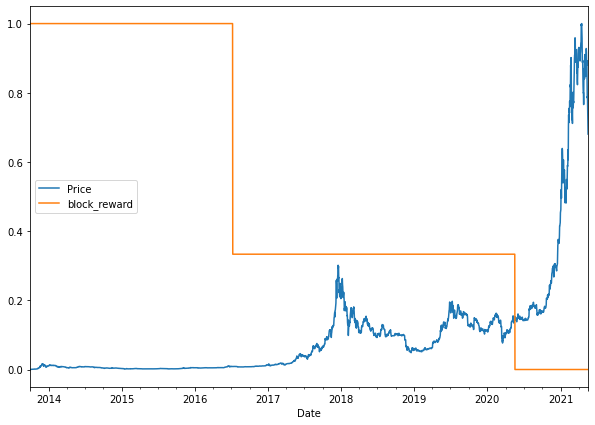

In [ ]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10,7))

## Making a windowes dataset

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)

bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [ ]:
# X (windows) and y (horizons)
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

## Model 6: Dense with Multivariate dataset

In [ ]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear") # linear acrtivation is the same as having no activation
], name="model_6_dense_multivariate")

model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_6.fit(x=X_train,
            y=y_train,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


In [ ]:
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 626.7440


626.7440185546875

In [ ]:
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate/")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 567.8899


567.889892578125

In [ ]:
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8844.684, 8769.905, 9045.17 , 8747.686, 8728.429, 8772.757,
       8667.292, 8503.437, 8470.313, 8527.244], dtype=float32)>

In [ ]:
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 567.8899,
 'mape': 2.5460758,
 'mase': 0.99762523,
 'mse': 1164816.4,
 'rmse': 1079.2666}

## Model 7: N-BEATS

### Building and testing  the N-BEATS block layer

In [ ]:
class NBeatsBlock(tf.keras.layers.Layer):
  # constructor
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has relu activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and the forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]

    return backcast, forecast

In [ ]:
# test NBeatsBlock
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON,
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [ ]:
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.07960171  0.32512033 -0.8428683  -0.6938985  -0.31720552 -0.5698734
 -0.6396662 ]
Forecast: 1.0071648359298706


### Preparing data for the N-BEATS algorithm

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# N-beats works with univariate
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)

bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [ ]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [ ]:
# Hyperparameters from the paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Gettingready for residual connection

In [ ]:
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# add
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


In [ ]:
%%time

tf.random.set_seed(42)

N_BEATS_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                  theta_size=THETA_SIZE,
                                  horizon=HORIZON,
                                  n_neurons=N_NEURONS,
                                  n_layers=N_LAYERS,
                                  name="InitialBlock")

stack_input = tf.keras.layers.Input(shape=(INPUT_SIZE), name="stack_input")
residuals, forecast = N_BEATS_block_layer(stack_input)

for i, _ in enumerate(range(N_STACKS-1)):
  backcast, block_forecast = NBeatsBlock(input_size=INPUT_SIZE,
                                         theta_size=THETA_SIZE,
                                         horizon=HORIZON,
                                         n_neurons=N_NEURONS,
                                         n_layers=N_LAYERS,
                                         name=f"NBeatsBlock_{i}"
                                         )(residuals)
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

model_7 = tf.keras.Model(inputs=stack_input, outputs=forecast, name="model_7_nbeats")

model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                            patience=100,
                                                            verbose=1)])


Epoch 635: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 878: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 978: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 2min 51s, sys: 4.91 s, total: 2min 56s
Wall time: 3min 32s


In [ ]:
# Evaluate
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 21ms/step - loss: 570.6834


570.6834106445312

In [ ]:
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8830.425, 8776.011, 9044.673, 8753.207, 8753.73 , 8758.992,
       8659.794, 8487.055, 8484.595, 8517.475], dtype=float32)>

In [ ]:
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 570.6834,
 'mape': 2.5599337,
 'mase': 1.0025327,
 'mse': 1161871.0,
 'rmse': 1077.9012}

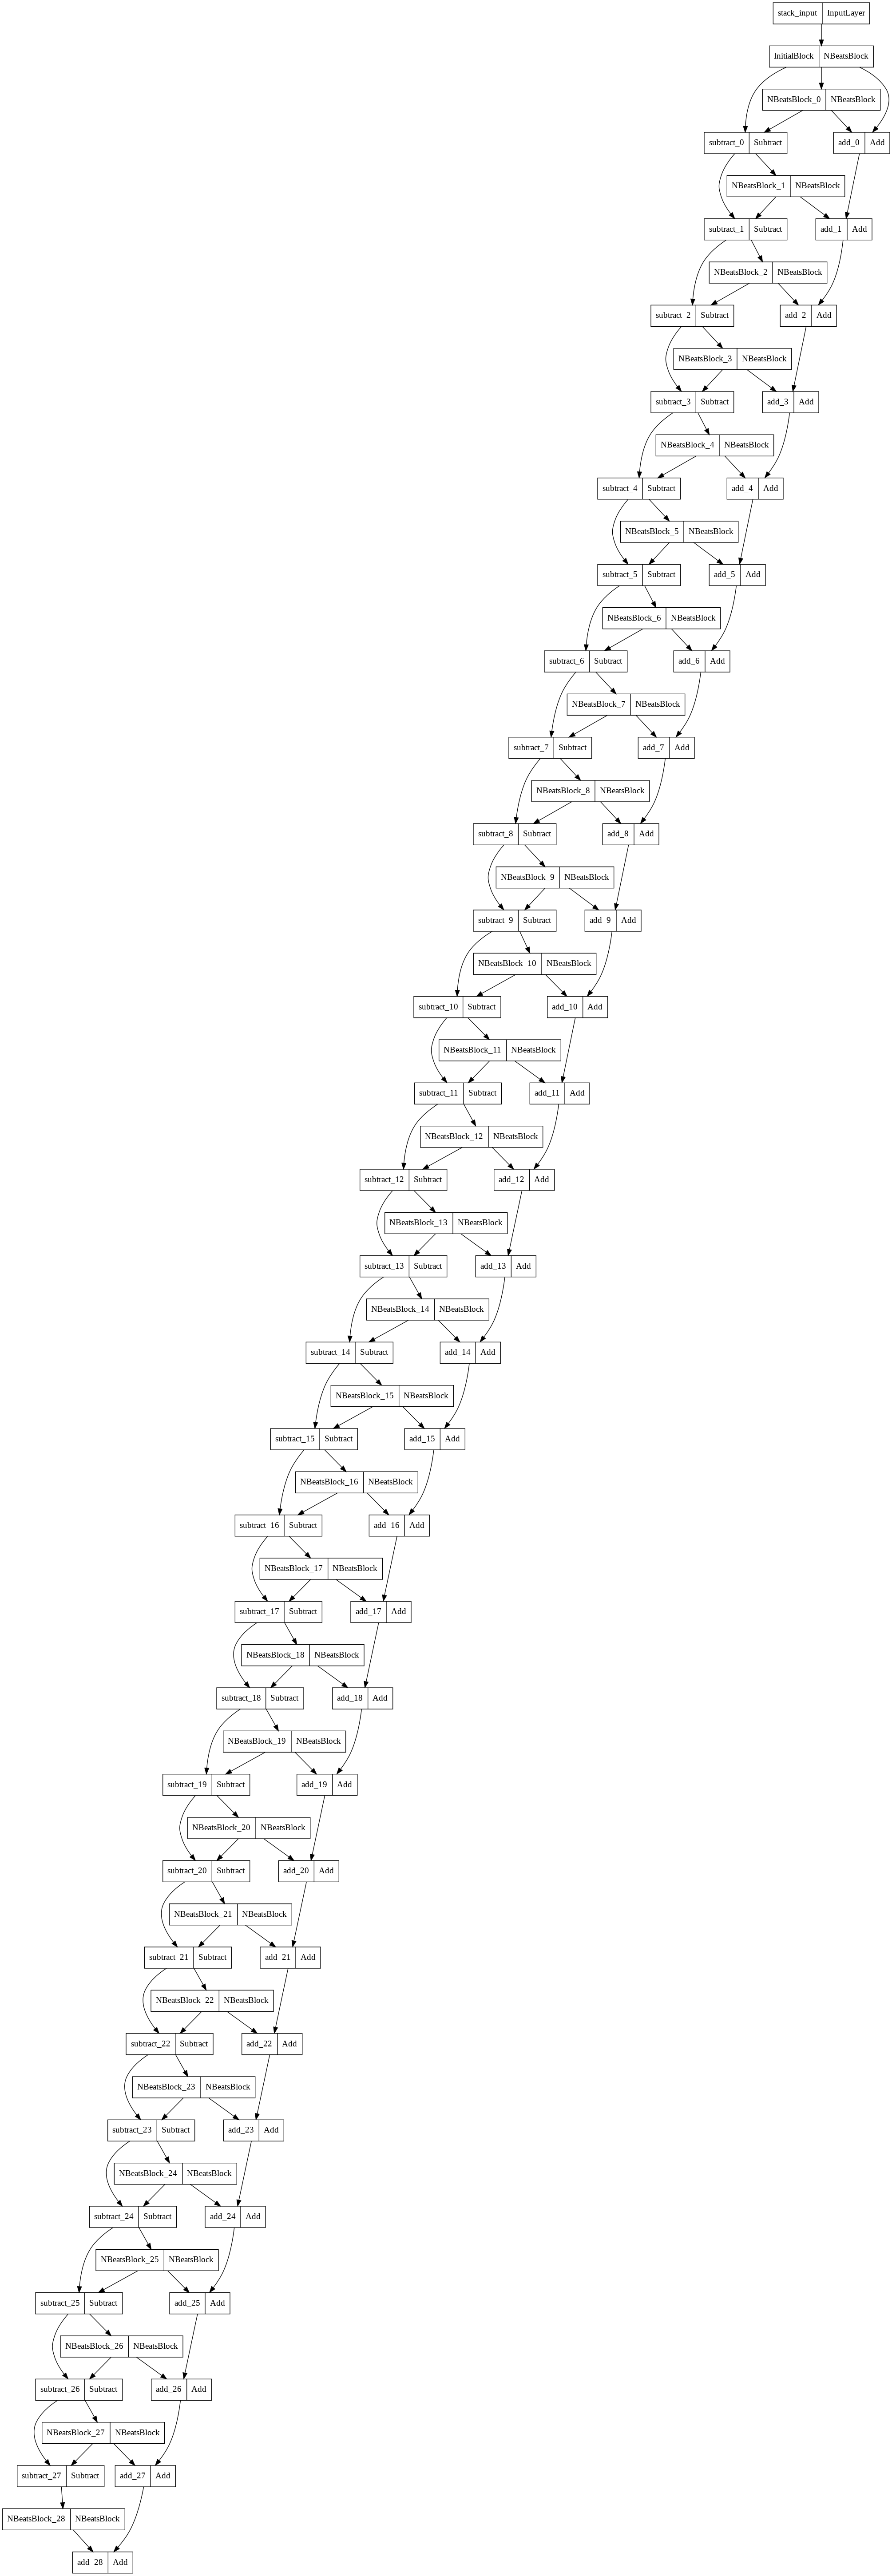

In [ ]:
# Plot
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Model 8: Ensemble

In [ ]:
def get_ensemble_models(horison=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE, and MAPE loss.
  ex) if num_iter=10, a list of 30 trained models will be returned:
  """
  # make empty list for trained ensemble models
  ensemble_models = []

  for i in range(num_iter):
    # buid and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      model = tf.keras.Sequential([
          layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          layers.Dense(HORIZON)
      ])

      # Compile
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # Fit
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      ensemble_models.append(model)
  
  return ensemble_models

In [ ]:
%%time
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 768: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 908: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 612: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 728: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 828: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 168: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 268: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 907: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 409: ReduceLROnPl

In [ ]:
# make predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
%%time
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)

CPU times: user 790 ms, sys: 26.8 ms, total: 817 ms
Wall time: 869 ms


In [ ]:
ensemble_preds

<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8806.254,  8777.472,  9025.316, ..., 50155.984, 49115.945,
        46566.203],
       [ 8766.839,  8743.359,  9054.609, ..., 49365.246, 48523.566,
        45335.805],
       [ 8745.424,  8733.034,  9101.386, ..., 49267.164, 47660.426,
        45370.047],
       ...,
       [ 8933.674,  8771.464,  9048.684, ..., 49450.156, 49738.58 ,
        46558.207],
       [ 8724.847,  8800.641,  9101.305, ..., 49572.258, 48515.23 ,
        45009.387],
       [ 8815.893,  8760.388,  9040.17 , ..., 49718.535, 48054.96 ,
        45827.605]], dtype=float32)>

In [ ]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8796.439, 8781.268, 9066.442, 8727.309, 8751.075, 8715.451,
       8669.385, 8479.959, 8458.714, 8528.716], dtype=float32)>

In [ ]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median[:10]

array([8791.941, 8777.472, 9060.631, 8718.495, 8750.296, 8720.731,
       8673.617, 8478.887, 8457.737, 8532.588], dtype=float32)

In [ ]:
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_mean)
ensemble_results

{'mae': 567.0964,
 'mape': 2.5813742,
 'mase': 0.99623126,
 'mse': 1147117.4,
 'rmse': 1071.0356}

In [ ]:
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_median)
ensemble_results

{'mae': 565.8045,
 'mape': 2.5815346,
 'mase': 0.9939618,
 'mse': 1141140.8,
 'rmse': 1068.242}

### Uncertainty Estimates

In [ ]:
def get_upper_lower(preds):

  std = tf.math.reduce_std(preds, axis=0)
  interval = 1.96 * std # Using Empirical rule
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval

  return lower, upper

In [ ]:
lower, upper = get_upper_lower(preds=ensemble_preds)
lower[:10], upper[:10]

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8698.096, 8720.267, 9007.09 , 8628.948, 8668.738, 8655.531,
        8612.896, 8401.799, 8397.278, 8501.555], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8894.783, 8842.269, 9125.795, 8825.669, 8833.412, 8775.371,
        8725.873, 8558.119, 8520.149, 8555.877], dtype=float32)>)

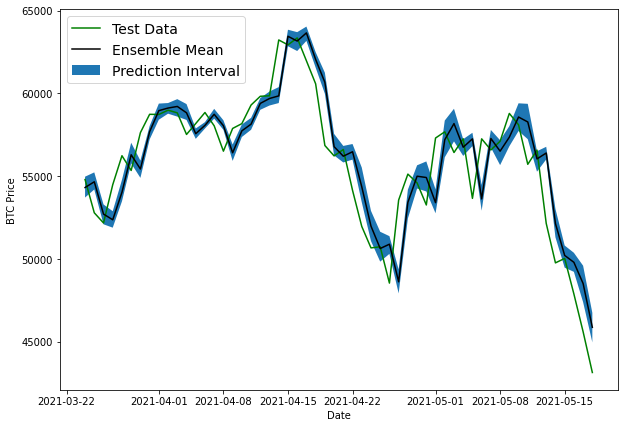

In [ ]:
ensemble_median = np.median(ensemble_preds, axis=0)

# plot
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Mean")
plt.xlabel("Date")
plt.ylabel("BTC Price")

plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:],
                 label="Prediction Interval")
plt.legend(loc="upper left", fontsize=14)

## Model 9: Training with the full historical data

In [ ]:
X_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis=1).to_numpy()
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

In [ ]:
# make data more efficient to run
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="Model_9_fulldata")

model_9.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

In [ ]:
model_9.fit(dataset_all,
            verbose=0,
            epochs=100)

In [ ]:
# Make predictions
INTO_FUTURE = 14

In [ ]:
def make_future_forecasts(values, model, into_future, window_size=WINDOW_SIZE)->list:
  """
  make future forecasts into_future steps after values end
  """

  future_forecast = []
  last_window = values[-window_size:]

  for _ in range(into_future):
    # Predict on the last window
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on:\n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    future_forecast.append(tf.squeeze(future_pred).numpy())

    last_window = np.append(last_window, future_pred)[-window_size:]
  
  return future_forecast

In [ ]:
future_forecast = make_future_forecasts(values=y_all,
                                        model=model_9,
                                        into_future=INTO_FUTURE,
                                        window_size=WINDOW_SIZE)

Predicting on:
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55764.47265625

Predicting on:
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55764.47265625] -> Prediction: 50985.9296875

Predicting on:
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55764.47265625 50985.9296875 ] -> Prediction: 48522.9609375

Predicting on:
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55764.47265625 50985.9296875  48522.9609375 ] -> Prediction: 48137.19921875

Predicting on:
 [47885.62525472 45604.61575361 43144.47129086 55764.47265625
 50985.9296875  48522.9609375  48137.19921875] -> Prediction: 47880.6328125

Predicting on:
 [45604.61575361 43144.47129086 55764.47265625 50985.9296875
 48522.9609375  48137.19921875 47880.6328125 ] -> Prediction: 46879.71484375

Predicting on:
 [43144.47129086 55764.47265625 50985.9296875  48522.960937

In [ ]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values
  """
  start_date = start_date + np.timedelta64(offset, "D")
  end_date = start_date + np.timedelta64(into_future, "D")
  return np.arange(start_date, end_date, dtype="datetime64[D]")

In [ ]:
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [ ]:
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [ ]:
# to connect plots
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55764.473, 50985.93 , 48522.96 , 48137.2  , 47880.633,
        46879.715, 48227.594, 53963.684, 49685.543, 47596.176, 48114.418,
        48807.996, 48623.85 , 50178.715], dtype=float32))

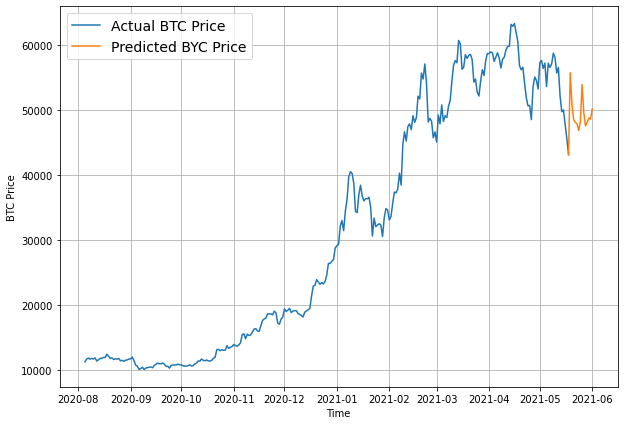

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BYC Price")

## Model 10: Turky problem

In [ ]:
btc_price_turky = btc_price.copy()
btc_price_turky[-1] = btc_price_turky[-1] / 100

In [ ]:
btc_price_turky[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [ ]:
btc_timesteps_turky = np.array(bitcoin_prices.index)
btc_timesteps_turky[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

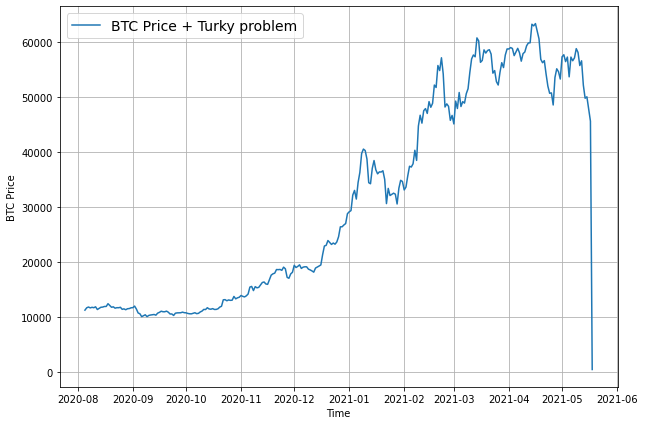

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turky,
                 values=btc_price_turky,
                 format="-",
                 label="BTC Price + Turky problem",
                 start=2500)

In [ ]:
full_windows, full_labels = make_windows(np.array(btc_price_turky), window_size=WINDOW_SIZE, horizon=HORIZON)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

In [ ]:
model_10 = tf.keras.models.clone_model(model_1)
model_10._name = "model_10_turky"

In [ ]:
model_10.summary()

Model: "model_10_turky"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_10.compile(loss="mae",
                 optimizer=tf.keras.optimizers.Adam())

In [ ]:
model_10.fit(X_train,
             y_train,
             epochs=100,
             verbose=0,
             batch_size=128,
             validation_data=(X_test, y_test),
             callbacks=[create_model_checkpoint(model_10.name)])

INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turky/assets


In [ ]:
# Evaluate
model_10.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 784.3420


784.342041015625

In [ ]:
model_10 = tf.keras.models.load_model("model_experiments/model_10_turky/")
model_10.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 639.2443


639.2443237304688

In [ ]:
model_10_preds = make_preds(model_10, X_test)
model_10_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8835.551 , 8771.771 , 9017.46  , 8766.701 , 8742.931 , 8721.777 ,
       8657.3545, 8528.889 , 8441.099 , 8516.809 ], dtype=float32)>

In [ ]:
model_10_results = evaluate_preds(y_true=y_test,
                                  y_pred=model_10_preds)
model_10_results

{'mae': 17120.297,
 'mape': 121.23575,
 'mase': 26.493715,
 'mse': 613761700.0,
 'rmse': 23696.547}

In [ ]:
model_1_results

{'mae': 568.95105,
 'mape': 2.5448983,
 'mase': 0.9994894,
 'mse': 1171743.8,
 'rmse': 1082.4711}

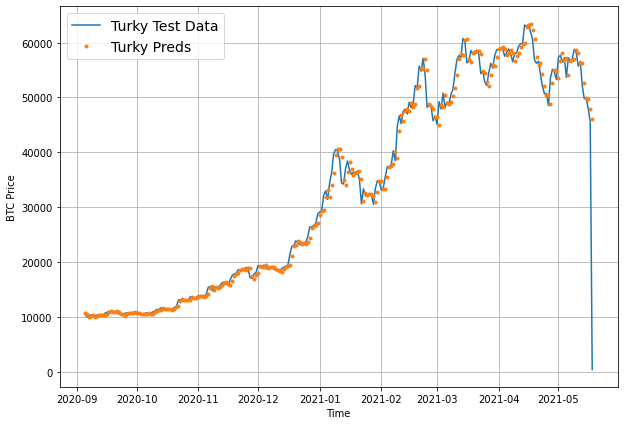

In [ ]:
plt.figure(figsize=(10, 7))
offset = 300
plot_time_series(timesteps=btc_timesteps_turky[-len(X_test):],
                 values=btc_price_turky[-len(y_test):],
                 format="-",
                 label="Turky Test Data",
                 start=offset)
plot_time_series(timesteps=btc_timesteps_turky[-len(X_test):],
                values=model_10_preds,
                label="Turky Preds",
                start=offset)

## Comparing Results

In [ ]:
model_results = pd.DataFrame({"naive model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w_30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_7_NBEATS": model_7_results,
                              "model_8_ensemble": ensemble_results,
                              "model_10_turky": model_10_results}).T
model_results

,mae,mse,rmse,mape,mase
naive model,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,568.951050,1.171744e+06,1082.471069,2.544898,0.999489
model_2_dense_w30_h1,605.874084,1.273361e+06,1128.432861,2.726445,1.059074
model_3_dense_w_30_h7,1237.506348,5.405198e+06,1425.747803,5.558878,2.202073
model_4_CONV1D,570.828430,1.176671e+06,1084.744751,2.559335,1.002787
model_5_LSTM,594.602966,1.267232e+06,1125.713867,2.671757,1.044553
model_6_multivariate,567.889893,1.164816e+06,1079.266602,2.546076,0.997625
model_7_NBEATS,570.683411,1.161871e+06,1077.901245,2.559934,1.002533
model_8_ensemble,565.804504,1.141141e+06,1068.241943,2.581535,0.993962
model_10_turky,17120.296875,6.137617e+08,23696.546875,121.235748,26.493715


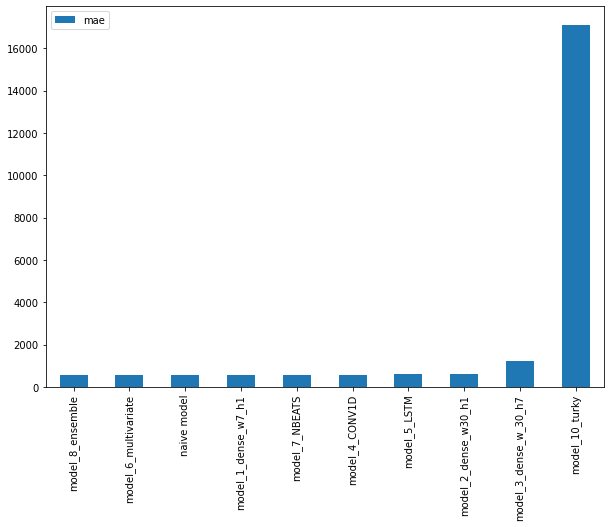

In [ ]:
# sort models
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")

## Extension

In [ ]:
train_windows.shape

(2224, 7)

In [ ]:
tf.argmax(train_windows, axis=1)

<tf.Tensor: shape=(2224,), dtype=int64, numpy=array([1, 0, 6, ..., 5, 4, 3])>

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_windows)
train_windows_scaled = scaler.transform(train_windows)
scaler.fit(train_labels)
train_labels_scaled = scaler.transform(train_labels)
train_windows_scaled[:5], train_windows_scaled.shape

(array([[7.90736096e-04, 8.85183194e-04, 0.00000000e+00, 0.00000000e+00,
         3.58772654e-05, 0.00000000e+00, 0.00000000e+00],
        [8.85183194e-04, 0.00000000e+00, 5.29416594e-04, 1.39854970e-04,
         0.00000000e+00, 5.98367452e-05, 6.50033109e-05],
        [0.00000000e+00, 5.29416594e-04, 6.69197523e-04, 1.03981435e-04,
         5.98367452e-05, 1.24836166e-04, 1.18350131e-04],
        [5.29416594e-04, 6.69197523e-04, 6.33342980e-04, 1.63811959e-04,
         1.24836166e-04, 1.78179795e-04, 2.18751368e-04],
        [6.69197523e-04, 6.33342980e-04, 6.93141828e-04, 2.28804621e-04,
         1.78179795e-04, 2.78575024e-04, 1.82968043e-04]]), (2224, 7))

In [ ]:
scaler.fit(test_windows)
test_windows_scaled = scaler.transform(test_windows)
scaler.fit(test_labels)
test_labels_scaled = scaler.transform(test_labels)

In [ ]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]), array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [ ]:
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

In [ ]:
model_1.fit(train_windows, train_labels,
            epochs=100,
            validation_data=(test_windows, test_labels),
            verbose=0
            )

In [ ]:
model_1.evaluate(test_windows_scaled, test_labels_scaled)

18/18 [==============================] - 0s 6ms/step - loss: 0.3835


0.3834528625011444

In [ ]:
model_1_preds_new = model_1.predict(test_windows_scaled)
model_1_preds_new[:5]

array([[0.4597902 ],
       [0.4582405 ],
       [0.4603503 ],
       [0.45577082],
       [0.45617568]], dtype=float32)

In [ ]:
model_1_results_new = evaluate_preds(y_true=test_labels_scaled,
                                     y_pred=model_1_preds_new)
model_1_results_new

{'mae': 0.38345283,
 'mape': 713910.94,
 'mase': 39.34083,
 'mse': 0.14753638,
 'rmse': 0.38345283}

In [ ]:
model_1_results

{'mae': 568.95105,
 'mape': 2.5448983,
 'mase': 0.9994894,
 'mse': 1171743.8,
 'rmse': 1082.4711}